# Imports

In [1]:
import numpy as np
import os
import sys
import pickle
import scipy

## Helper Functions

In [2]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)
import atlasMapping
import fixedDensity as fd

# Set Directory Paths

In [3]:
# Directory path to load preconstructed Atlas Data
%store -r baseDir

# Directory path to load formatted Pathology Data
%store -r path_dataDir
# Directory path to save Calcualted Analysis Data - Pathology
%store -r path_CalData

# Directory path to load formatted Thickness At Path Data
%store -r thickAtPath_dataDir
# Directory path to save Calcualted Analysis Data
%store -r thickAtPath_CalData
# Directory path to save Figures
%store -r thickAtPath_Fig

# Loading

## Loading the preconstructed atlas data

In [4]:
# loads the preconstructed Atlas data
NetworkDataGeneral = scipy.io.loadmat(os.path.join(baseDir, 'NetworkAnalysisGeneral', 'FTDGeneralData_20221114.mat'))

## Loading Thickness Values at Pathology Regions / TAU, TDP --> Dropped

In [5]:
# HCthicknessAtPath
with open(os.path.join(thickAtPath_dataDir, 'HCthicknessAtPath.pkl'), 'rb') as f:
    HCthicknessAtPath = pickle.load(f)
f.close()

# TAUthicknessAtPath_Drop
with open(os.path.join(thickAtPath_dataDir, 'TAUthicknessAtPath_Drop.pkl'), 'rb') as f:
    TAUthicknessAtPath_Drop = pickle.load(f)
f.close()

# TDPthicknessAtPath_Drop
with open(os.path.join(thickAtPath_dataDir, 'TDPthicknessAtPath_Drop.pkl'), 'rb') as f:
    TDPthicknessAtPath_Drop = pickle.load(f)
f.close()

## Thickness At Path Covariance Matrices - Dictionaries (Original, Z, W Score) / TAU, TDP --> Dropped

In [30]:
# cov_thickAtPath_dict_Drop
with open(os.path.join(thickAtPath_CalData, 'cov_thickAtPath_dict_Drop.pkl'), 'rb') as f:
    cov_thickAtPath_dict_Drop = pickle.load(f)
f.close()

# cov_thickAtPath_w_dict_Drop
with open(os.path.join(thickAtPath_CalData, 'cov_thickAtPath_w_dict_Drop.pkl'), 'rb') as f:
    cov_thickAtPath_w_dict_Drop = pickle.load(f)
f.close()

## Loading Pathology Labels (TAU, TDP) - Dropped

In [7]:
# LabelNames
with open(os.path.join(path_CalData, 'LabelNames.pkl'), 'rb') as f:
    LabelNames = pickle.load(f)
f.close()

# pathNames_TAU_Drop
with open(os.path.join(path_CalData, 'pathNames_TAU_Drop.pkl'), 'rb') as f:
    pathNames_TAU_Drop = pickle.load(f)
f.close()

# pathNames_TDP_Drop
with open(os.path.join(path_CalData, 'pathNames_TDP_Drop.pkl'), 'rb') as f:
    pathNames_TDP_Drop = pickle.load(f)
f.close()

## Loading pathCoM (TAU, TDP) - Dropped

In [8]:
# pathCoM
with open(os.path.join(path_dataDir, 'pathCoM.pkl'), 'rb') as f:
    pathCoM = pickle.load(f)
f.close()

pathCoM = np.vstack((pathCoM[:, :, 0], pathCoM[:, :, 1]))

# CoM_TAU_Drop
with open(os.path.join(path_dataDir, 'CoM_TAU_Drop.pkl'), 'rb') as f:
    CoM_TAU_Drop = pickle.load(f)
f.close()

# CoM_TDP_Drop
with open(os.path.join(path_dataDir, 'CoM_TDP_Drop.pkl'), 'rb') as f:
    CoM_TDP_Drop = pickle.load(f)
f.close()

# Draw 3D Atlas Map

## Define Variables

### Set fixed density value 

In [9]:
fd_val = 40 # Get top 100

## Thickness At Path Value - Original

### Define Vectors for Node Size and Node Color

In [10]:
# FOR NODE SIZE (Original Thickness Value)
HCthicknessAtPath_exp = HCthicknessAtPath
TAUthicknessAtPath_exp = TAUthicknessAtPath_Drop
TDPthicknessAtPath_exp = TDPthicknessAtPath_Drop

# Get the MAX/MIN Thickness values
minThickAtPath_HC = np.nanmin(np.nanmean(HCthicknessAtPath_exp, axis=0))
minThickAtPath_TAU = np.nanmin(np.nanmean(TAUthicknessAtPath_exp, axis=0))
minThickAtPath_TDP = np.nanmin(np.nanmean(TDPthicknessAtPath_exp, axis=0))

vanishing_val = 0.2
maxThickAtPath_HC = np.nanmax(np.nanmean(HCthicknessAtPath_exp, axis=0) - minThickAtPath_HC) + vanishing_val
maxThickAtPath_TAU = np.nanmax(np.nanmean(TAUthicknessAtPath_exp, axis=0) - minThickAtPath_TAU) + vanishing_val
maxThickAtPath_TDP = np.nanmax(np.nanmean(TDPthicknessAtPath_exp, axis=0) - minThickAtPath_TDP) + vanishing_val

# NODE Size
markerVecHC = np.nanmean(HCthicknessAtPath_exp, axis=0)
markerVecHC = 3 * (1 - ((markerVecHC - minThickAtPath_HC) / maxThickAtPath_HC))

markerVecTAU = np.nanmean(TAUthicknessAtPath_exp, axis=0)
markerVecTAU = 3 * (1 - ((markerVecTAU - minThickAtPath_TAU) / maxThickAtPath_TAU))

markerVecTDP = np.nanmean(TDPthicknessAtPath_exp, axis=0)
markerVecTDP = 3 * (1 - ((markerVecTDP - minThickAtPath_TDP) / maxThickAtPath_TDP))

# Node color --> Set as red (because cm.jet: 1 --> Red)
colorVecHC = np.ones(HCthicknessAtPath.shape[1])
colorVecTAU = np.ones(TAUthicknessAtPath_Drop.shape[1])
colorVecTDP = np.ones(TDPthicknessAtPath_Drop.shape[1])

### HC

/Users/hyroh/Desktop/FTD_Research/mBIN/FTD_JupyterNotebook/HelperFunctions/Analysis_HelperFuntions/atlasMapping.py:139: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # Makes the mapping tighter --> Bigger


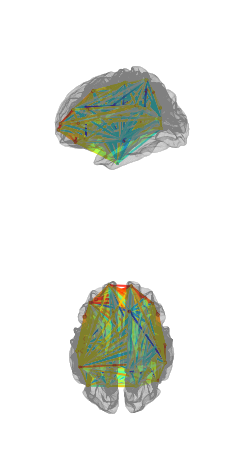

In [11]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thickAtPath_dict_Drop['HC'], pathCoM, LabelNames, markerVecHC, 
                          colorVecHC, 
                          thickAtPath_Fig, '3D_Atlas_CovMatAtPath_(HC)', covType='original', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU

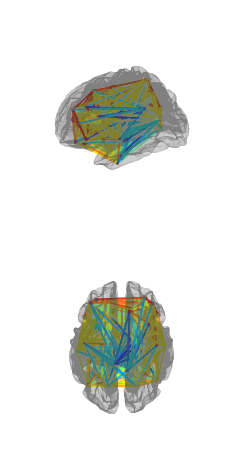

In [12]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thickAtPath_dict_Drop['TAU'], CoM_TAU_Drop, pathNames_TAU_Drop, 
                          markerVecTAU, 
                          colorVecTAU, 
                          thickAtPath_Fig, '3D_Atlas_CovMatAtPath_(TAU)', covType='original', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP

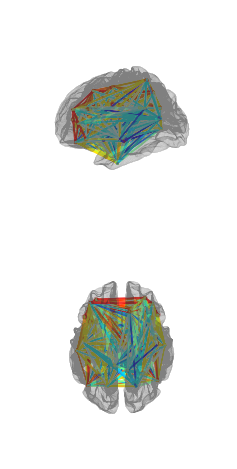

In [13]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thickAtPath_dict_Drop['TDP'], CoM_TDP_Drop, pathNames_TDP_Drop, 
                          markerVecTDP, 
                          colorVecTDP, 
                          thickAtPath_Fig, '3D_Atlas_CovMatAtPath_(TDP)', covType='original', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU > HC

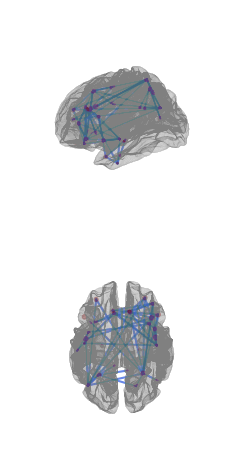

In [14]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thickAtPath_dict_Drop['TAU_gt_HC'], 
                          CoM_TAU_Drop, 
                          pathNames_TAU_Drop, 
                          markerVecTAU, 
                          colorVecTAU, 
                          thickAtPath_Fig, 
                          '3D_Atlas_CovMatAtPath_(TAU_gt_HC)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP > HC

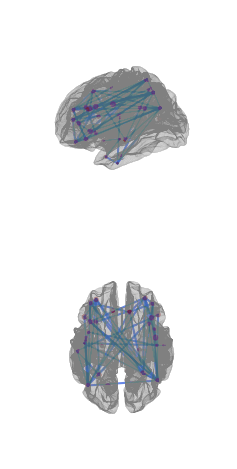

In [15]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thickAtPath_dict_Drop['TDP_gt_HC'], 
                          CoM_TDP_Drop, 
                          pathNames_TDP_Drop, 
                          markerVecTDP, 
                          colorVecTDP, 
                          thickAtPath_Fig, '3D_Atlas_CovMatAtPath_(TDP_gt_HC)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU < HC

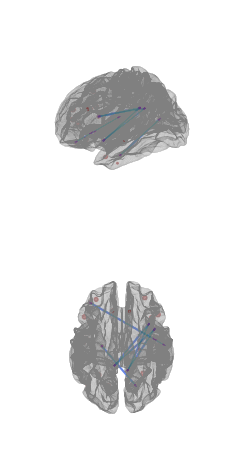

In [16]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thickAtPath_dict_Drop['TAU_lt_HC'], 
                          CoM_TAU_Drop, 
                          pathNames_TAU_Drop, 
                          markerVecTAU, 
                          colorVecTAU, 
                          thickAtPath_Fig, '3D_Atlas_CovMatAtPath_(TAU_lt_HC)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP < HC

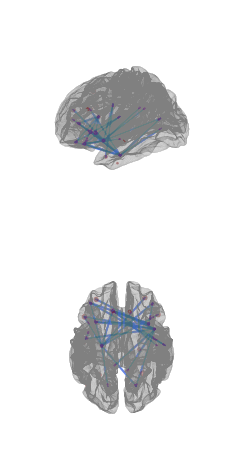

In [17]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thickAtPath_dict_Drop['TDP_lt_HC'], 
                          CoM_TDP_Drop, 
                          pathNames_TDP_Drop, 
                          markerVecTDP, 
                          colorVecTDP, 
                          thickAtPath_Fig, '3D_Atlas_CovMatAtPath_(TDP_lt_HC)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU > TDP

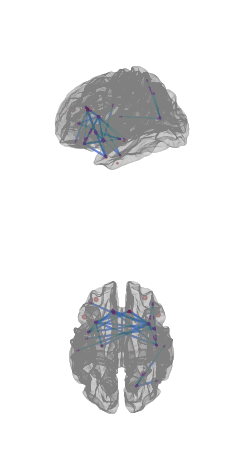

In [18]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thickAtPath_dict_Drop['TAU_gt_TDP'], 
                          CoM_TAU_Drop, 
                          pathNames_TAU_Drop, 
                          markerVecTAU, 
                          colorVecTAU, 
                          thickAtPath_Fig, '3D_Atlas_CovMatAtPath_(TAU_gt_TDP)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP > TAU

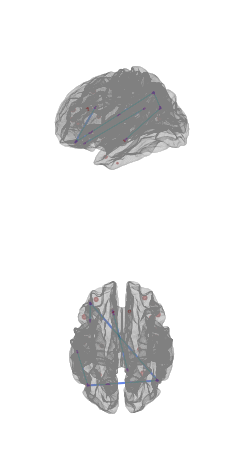

In [19]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thickAtPath_dict_Drop['TDP_gt_TAU'], 
                          CoM_TDP_Drop, 
                          pathNames_TDP_Drop, 
                          markerVecTDP, 
                          colorVecTDP, 
                          thickAtPath_Fig, '3D_Atlas_CovMatAtPath_(TDP_gt_TAU)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## Thickness Value - Original - Fixed Density

### HC

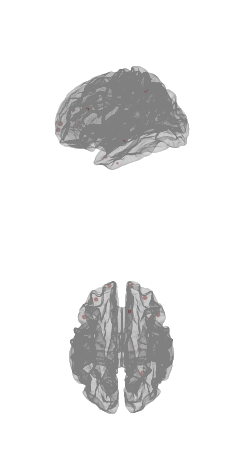

In [20]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thickAtPath_dict_Drop['HC'], fd_val), 
                          pathCoM, 
                          LabelNames, 
                          markerVecHC, 
                          colorVecHC, 
                          thickAtPath_Fig, '3D_Atlas_CovMatAtPath_(HC)(FixedDensity_40)', 
                          covType='original', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU

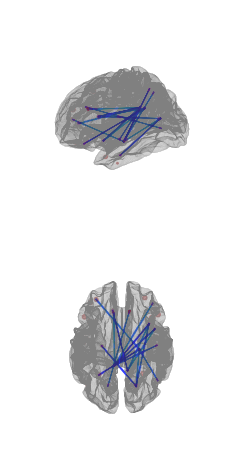

In [21]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thickAtPath_dict_Drop['TAU'], fd_val), 
                          CoM_TAU_Drop, 
                          pathNames_TAU_Drop, 
                          markerVecTAU, 
                          colorVecTAU, 
                          thickAtPath_Fig, '3D_Atlas_CovMatAtPath_(TAU)(FixedDensity_40)', 
                          covType='original', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP

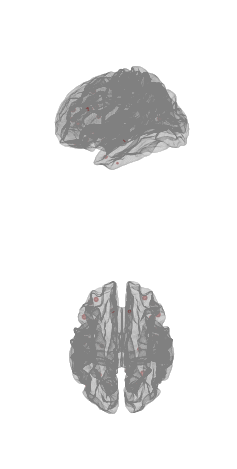

In [22]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thickAtPath_dict_Drop['TDP'], fd_val), 
                          CoM_TDP_Drop, 
                          pathNames_TDP_Drop, 
                          markerVecTDP, 
                          colorVecTDP, 
                          thickAtPath_Fig, '3D_Atlas_CovMatAtPath_(TDP)(FixedDensity_40)', 
                          covType='original', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU > HC

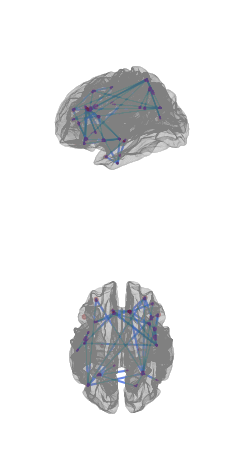

In [23]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thickAtPath_dict_Drop['TAU_gt_HC_raw'], fd_val), 
                          CoM_TAU_Drop, 
                          pathNames_TAU_Drop, 
                          markerVecTAU, 
                          colorVecTAU, 
                          thickAtPath_Fig, '3D_Atlas_CovMatAtPath_(TAU_gt_HC)(FixedDensity_40)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP > HC

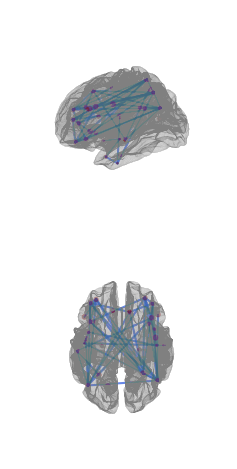

In [24]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thickAtPath_dict_Drop['TDP_gt_HC_raw'], fd_val), 
                          CoM_TDP_Drop, 
                          pathNames_TDP_Drop, 
                          markerVecTDP, 
                          colorVecTDP, 
                          thickAtPath_Fig, '3D_Atlas_CovMatAtPath_(TDP_gt_HC)(FixedDensity_40)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU < HC

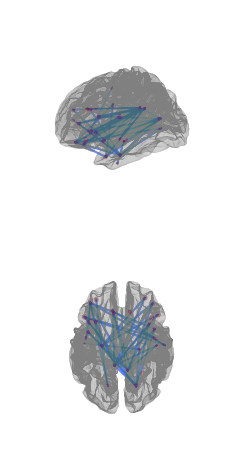

In [25]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thickAtPath_dict_Drop['TAU_lt_HC_raw'], fd_val), 
                          CoM_TAU_Drop, 
                          pathNames_TAU_Drop, 
                          markerVecTAU, 
                          colorVecTAU, 
                          thickAtPath_Fig, '3D_Atlas_CovMatAtPath_(TAU_lt_HC)(FixedDensity_40)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP < HC

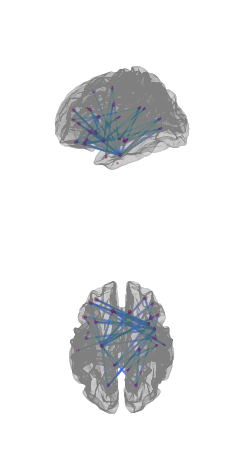

In [26]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thickAtPath_dict_Drop['TDP_lt_HC_raw'], fd_val), 
                          CoM_TDP_Drop, 
                          pathNames_TDP_Drop, 
                          markerVecTDP, 
                          colorVecTDP, 
                          thickAtPath_Fig, '3D_Atlas_CovMatAtPath_(TDP_lt_HC)(FixedDensity_40)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU > TDP

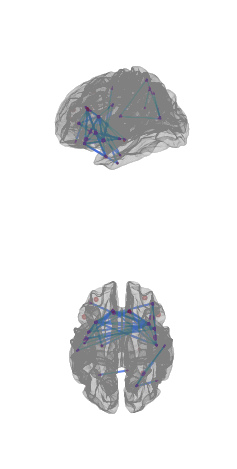

In [27]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thickAtPath_dict_Drop['TAU_gt_TDP_raw'], fd_val), 
                          CoM_TAU_Drop, 
                          pathNames_TAU_Drop, 
                          markerVecTAU, 
                          colorVecTAU, 
                          thickAtPath_Fig, '3D_Atlas_CovMatAtPath_(TAU_gt_TDP)(FixedDensity_40)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP > TAU

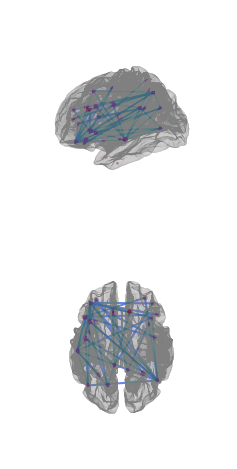

In [28]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thickAtPath_dict_Drop['TDP_gt_TAU_raw'], fd_val), 
                          CoM_TDP_Drop, 
                          pathNames_TDP_Drop, 
                          markerVecTDP, 
                          colorVecTDP, 
                          thickAtPath_Fig, '3D_Atlas_CovMatAtPath_(TDP_gt_TAU)(FixedDensity_40)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## Thickness - W Score

### Define Vectors for Node Size and Node Color

In [29]:
# FOR NODE SIZE (Original Thickness Value)
HCthicknessAtPath_exp = HCthicknessAtPath
TAUthicknessAtPath_exp = TAUthicknessAtPath_Drop
TDPthicknessAtPath_exp = TDPthicknessAtPath_Drop

# Get the MAX/MIN Thickness values
minThickAtPath_HC = np.nanmin(np.nanmean(HCthicknessAtPath_exp, axis=0))
minThickAtPath_TAU = np.nanmin(np.nanmean(TAUthicknessAtPath_exp, axis=0))
minThickAtPath_TDP = np.nanmin(np.nanmean(TDPthicknessAtPath_exp, axis=0))

vanishing_val = 0.2
maxThickAtPath_HC = np.nanmax(np.nanmean(HCthicknessAtPath_exp, axis=0) - minThickAtPath_HC) + vanishing_val
maxThickAtPath_TAU = np.nanmax(np.nanmean(TAUthicknessAtPath_exp, axis=0) - minThickAtPath_TAU) + vanishing_val
maxThickAtPath_TDP = np.nanmax(np.nanmean(TDPthicknessAtPath_exp, axis=0) - minThickAtPath_TDP) + vanishing_val

# NODE Size
markerVecHC = np.nanmean(HCthicknessAtPath_exp, axis=0)
markerVecHC = 3 * (1 - ((markerVecHC - minThickAtPath_HC) / maxThickAtPath_HC))

markerVecTAU = np.nanmean(TAUthicknessAtPath_exp, axis=0)
markerVecTAU = 3 * (1 - ((markerVecTAU - minThickAtPath_TAU) / maxThickAtPath_TAU))

markerVecTDP = np.nanmean(TDPthicknessAtPath_exp, axis=0)
markerVecTDP = 3 * (1 - ((markerVecTDP - minThickAtPath_TDP) / maxThickAtPath_TDP))

# Node color --> Set as red (because cm.jet: 1 --> Red)
colorVecHC = np.ones(HCthicknessAtPath.shape[1])
colorVecTAU = np.ones(TAUthicknessAtPath_Drop.shape[1])
colorVecTDP = np.ones(TDPthicknessAtPath_Drop.shape[1])

### HC

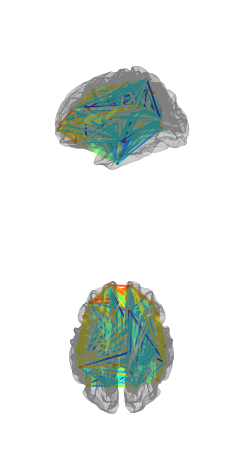

In [31]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thickAtPath_w_dict_Drop['HC'], 
                          pathCoM, 
                          LabelNames, 
                          markerVecHC, 
                          colorVecHC, 
                          thickAtPath_Fig, '3D_Atlas_CovMat_thick_w_(HC)', 
                          covType='original', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU

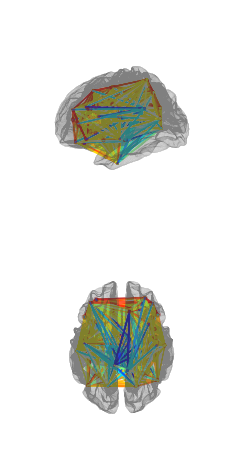

In [32]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thickAtPath_w_dict_Drop['TAU'], 
                          CoM_TAU_Drop, 
                          pathNames_TAU_Drop, 
                          markerVecTAU, 
                          colorVecTAU, 
                          thickAtPath_Fig, '3D_Atlas_CovMat_thick_w_(TAU)', 
                          covType='original', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP

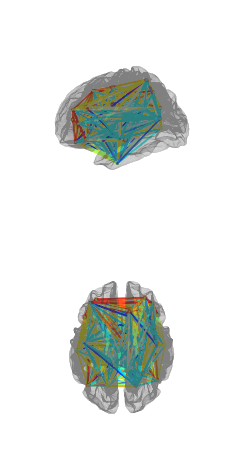

In [33]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thickAtPath_w_dict_Drop['TDP'], 
                          CoM_TDP_Drop, 
                          pathNames_TDP_Drop, 
                          markerVecTDP, 
                          colorVecTDP, 
                          thickAtPath_Fig, '3D_Atlas_CovMat_thick_w_(TDP)', 
                          covType='original', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU > HC

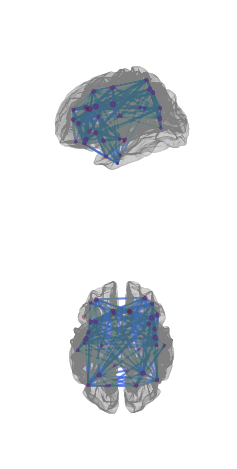

In [34]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thickAtPath_w_dict_Drop['TAU_gt_HC'], 
                          CoM_TAU_Drop, 
                          pathNames_TAU_Drop, 
                          markerVecTAU, 
                          colorVecTAU, 
                          thickAtPath_Fig, '3D_Atlas_CovMat_thick_w_(TAU_gt_HC)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP > HC

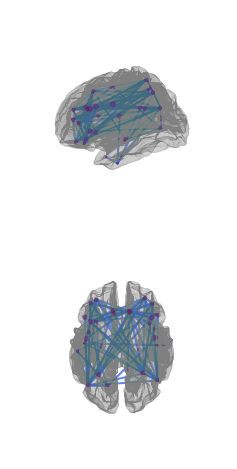

In [35]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thickAtPath_w_dict_Drop['TDP_gt_HC'], 
                          CoM_TDP_Drop, 
                          pathNames_TDP_Drop, 
                          markerVecTDP, 
                          colorVecTDP, 
                          thickAtPath_Fig, '3D_Atlas_CovMat_thick_w_(TDP_gt_HC)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU < HC

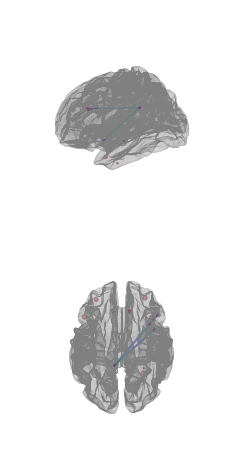

In [36]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thickAtPath_w_dict_Drop['TAU_lt_HC'], 
                          CoM_TAU_Drop, 
                          pathNames_TAU_Drop, 
                          markerVecTAU, 
                          colorVecTAU, 
                          thickAtPath_Fig, '3D_Atlas_CovMat_thick_w_(TAU_lt_HC)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP < HC

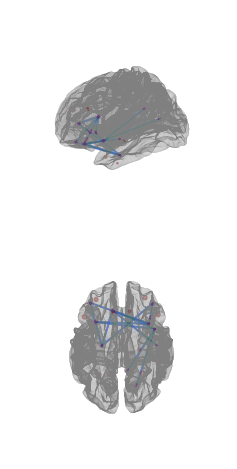

In [37]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thickAtPath_w_dict_Drop['TDP_lt_HC'], 
                          CoM_TDP_Drop, 
                          pathNames_TDP_Drop, 
                          markerVecTDP, 
                          colorVecTDP, 
                          thickAtPath_Fig, '3D_Atlas_CovMat_thick_w_(TDP_lt_HC)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU > TDP

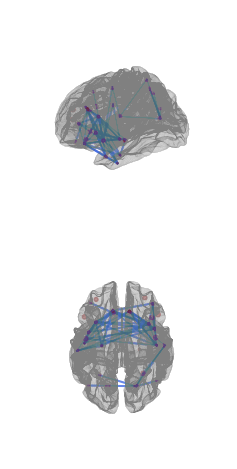

In [38]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thickAtPath_w_dict_Drop['TAU_gt_TDP'], 
                          CoM_TAU_Drop, 
                          pathNames_TAU_Drop, 
                          markerVecTAU, 
                          colorVecTAU, 
                          thickAtPath_Fig, '3D_Atlas_CovMat_thick_w_(TAU_gt_TDP)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP > TAU

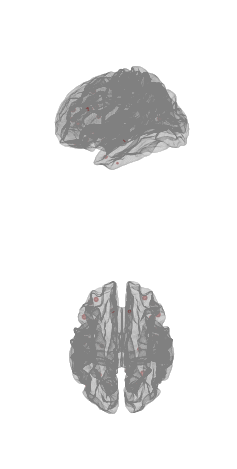

In [39]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_thickAtPath_w_dict_Drop['TDP_gt_TAU'], 
                          CoM_TDP_Drop, 
                          pathNames_TDP_Drop, 
                          markerVecTDP, 
                          colorVecTDP, 
                          thickAtPath_Fig, '3D_Atlas_CovMat_thick_w_(TDP_gt_TAU)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## Thickness - W Score - Fixed Density

### HC

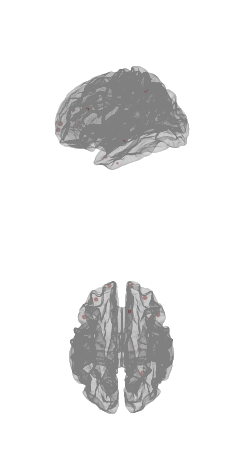

In [40]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thickAtPath_w_dict_Drop['HC'], fd_val), 
                          pathCoM, 
                          LabelNames, 
                          markerVecHC, 
                          colorVecHC, 
                          thickAtPath_Fig, '3D_Atlas_CovMat_thick_w_(HC)(FixedDensity_40)', 
                          covType='original', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU

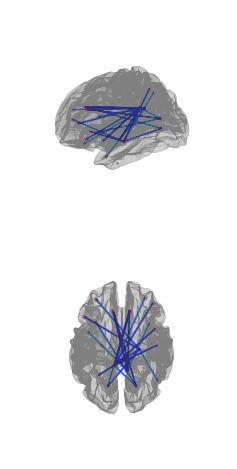

In [41]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thickAtPath_w_dict_Drop['TAU'], fd_val), 
                          CoM_TAU_Drop, 
                          pathNames_TAU_Drop, 
                          markerVecTAU, 
                          colorVecTAU, 
                          thickAtPath_Fig, '3D_Atlas_CovMat_thick_w_(TAU)(FixedDensity_40)', 
                          covType='original', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP

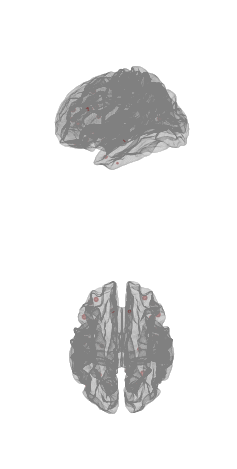

In [42]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thickAtPath_w_dict_Drop['TDP'], fd_val), 
                          CoM_TDP_Drop, 
                          pathNames_TDP_Drop, 
                          markerVecTDP, 
                          colorVecTDP, 
                          thickAtPath_Fig, '3D_Atlas_CovMat_thick_w_(TDP)(FixedDensity_40)', 
                          covType='original', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU > HC

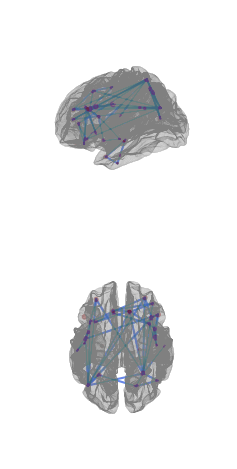

In [43]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thickAtPath_w_dict_Drop['TAU_gt_HC_raw'], fd_val), 
                          CoM_TAU_Drop, 
                          pathNames_TAU_Drop, 
                          markerVecTAU, 
                          colorVecTAU, 
                          thickAtPath_Fig, '3D_Atlas_CovMat_thick_w_(TAU_gt_HC)(FixedDensity_40)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP > HC

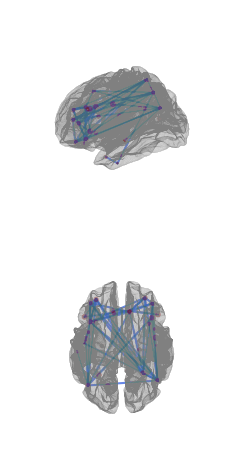

In [44]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thickAtPath_w_dict_Drop['TDP_gt_HC_raw'], fd_val), 
                          CoM_TDP_Drop, 
                          pathNames_TDP_Drop, 
                          markerVecTDP, 
                          colorVecTDP, 
                          thickAtPath_Fig, '3D_Atlas_CovMat_thick_w_(TDP_gt_HC)(FixedDensity_40)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU < HC

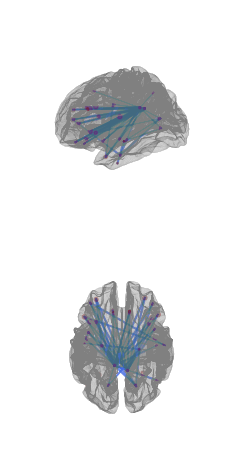

In [45]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thickAtPath_w_dict_Drop['TAU_lt_HC_raw'], fd_val), 
                          CoM_TAU_Drop, 
                          pathNames_TAU_Drop, 
                          markerVecTAU, 
                          colorVecTAU, 
                          thickAtPath_Fig, '3D_Atlas_CovMat_thick_w_(TAU_lt_HC)(FixedDensity_40)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP < HC

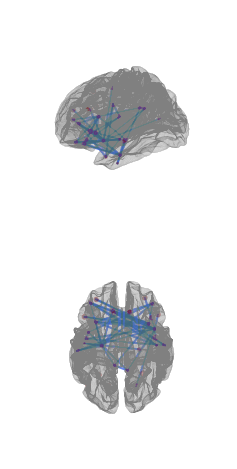

In [46]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thickAtPath_w_dict_Drop['TDP_lt_HC_raw'], fd_val), 
                          CoM_TDP_Drop, 
                          pathNames_TDP_Drop, 
                          markerVecTDP, 
                          colorVecTDP, 
                          thickAtPath_Fig, '3D_Atlas_CovMat_thick_w_(TDP_lt_HC)(FixedDensity_40)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TAU > TDP

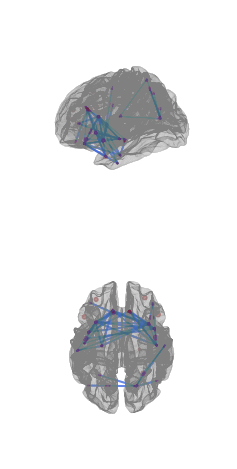

In [47]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thickAtPath_w_dict_Drop['TAU_gt_TDP_raw'], fd_val), 
                          CoM_TAU_Drop, 
                          pathNames_TAU_Drop, 
                          markerVecTAU, 
                          colorVecTAU, 
                          thickAtPath_Fig, '3D_Atlas_CovMat_thick_w_(TAU_gt_TDP)(FixedDensity_40)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### TDP > TAU

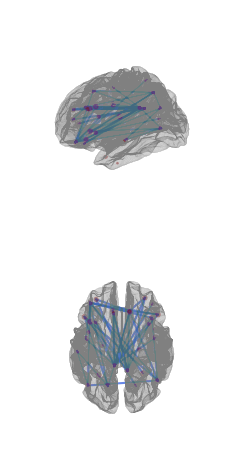

In [48]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(cov_thickAtPath_w_dict_Drop['TDP_gt_TAU_raw'], fd_val), 
                          CoM_TDP_Drop, 
                          pathNames_TDP_Drop, 
                          markerVecTDP, 
                          colorVecTDP, 
                          thickAtPath_Fig, '3D_Atlas_CovMat_thick_w_(TDP_gt_TAU)(FixedDensity_40)', 
                          covType='sig', 
                          nodeTransparency = 0.3, edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)